In [ ]:
# !pip3 install statsmodels --user --upgrade --quiet
# !pip3 install scikit-optimize --user --upgrade --quiet
# !pip3 install pandas_profiling --user --upgrade --quiet
# !pip3 install matplotlib --user --upgrade --quiet
# !pip3 install eli5 --user --upgrade --quiet

In [ ]:
# !pip3 freeze > requeriments.txt

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, \
                                    GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
                            mean_absolute_error,make_scorer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from yellowbrick.regressor import AlphaSelection, residuals_plot, \
                                  prediction_error
from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.neighbors import LocalOutlierFactor
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from google.colab import files
import statsmodels.api as sm
from sklearn.svm import SVR
import missingno as msno
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
                            ExtraTreesRegressor, IsolationForest
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
import keras
import math
from scipy.stats import skew
import eli5

from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))


warnings.filterwarnings('ignore')

### Carga de datos

In [ ]:
files.upload()
workers_data = pd.read_csv("garments_worker_productivity.csv", header=0)
workers_data.head()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
workers_data.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [ ]:
data_columns=workers_data.drop(columns="actual_productivity").columns
X_train, X_test, y_train, y_test = train_test_split(workers_data[data_columns], workers_data['actual_productivity'], test_size=0.3, random_state=157)

### Visualización

In [ ]:
workers_data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [ ]:
profile = ProfileReport(workers_data)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

### Preprocesamiento

#### Corrección de valores

##### Department

In [ ]:
X_train["department"].unique()

array(['sweing', 'finishing', 'finishing '], dtype=object)

In [ ]:
len(X_train[X_train['department']=='finishing ']), len(X_train[X_train['department']=='finishing'])

(170, 181)

In [ ]:
X_train['department'].mask(X_train['department'] == 'finishing ', "finishing", inplace=True)

In [ ]:
X_train["department"].unique(), len(X_train[X_train['department']=='finishing'])

(array(['sweing', 'finishing'], dtype=object), 351)

##### Number of Workers 

In [ ]:
X_train["no_of_workers"].unique()

array([59. , 31.5, 10. , 57. , 45. ,  8. , 12. , 52. , 32. , 20. , 56.5,
       57.5, 56. , 31. , 58. , 17. , 34. , 15. ,  9. , 30.5, 51.5, 48. ,
       55. ,  7. , 14. , 60. , 51. , 59.5, 27. , 50. , 33. , 89. , 54. ,
        5. , 42. , 55.5,  2. , 18. , 58.5, 35. ,  4. , 53. , 22. ,  6. ,
       29.5, 38. , 25. , 16. , 19. , 44. , 33.5, 47. , 49. , 24. , 54.5])

In [ ]:
X_train["no_of_workers"] = np.array(map(lambda x: math.ceil(x), X_train["no_of_workers"]))

In [ ]:
X_train["no_of_workers"].unique()

array([59, 32, 10, 57, 45, 8, 12, 52, 20, 58, 56, 31, 17, 34, 15, 9, 48,
       55, 7, 14, 60, 51, 27, 50, 33, 89, 54, 5, 42, 2, 18, 35, 4, 53, 22,
       6, 30, 38, 25, 16, 19, 44, 47, 49, 24], dtype=object)

In [ ]:
X_train["no_of_workers"] = pd.to_numeric(X_train["no_of_workers"])

##### Actual Productivity

In [ ]:
np.sort(y_train.unique())

array([0.23579545, 0.23804167, 0.24731602, 0.24941667, 0.2565    ,
       0.258     , 0.259375  , 0.26097879, 0.26117424, 0.2640625 ,
       0.26821429, 0.271875  , 0.28033333, 0.28305449, 0.28395833,
       0.28533333, 0.28704167, 0.29530774, 0.30211735, 0.30277037,
       0.30357447, 0.31120746, 0.31385281, 0.31416667, 0.325     ,
       0.32740741, 0.32813158, 0.32954545, 0.32996488, 0.33011364,
       0.33214647, 0.33235931, 0.33797349, 0.34236111, 0.34995139,
       0.35003125, 0.35020649, 0.35021836, 0.35030172, 0.35041667,
       0.35063299, 0.35070642, 0.35325965, 0.35444444, 0.35542803,
       0.35553448, 0.35645833, 0.36266667, 0.36531871, 0.36871875,
       0.37046657, 0.37889515, 0.38800781, 0.38883036, 0.39354885,
       0.39472222, 0.39774306, 0.39875   , 0.40033279, 0.40324216,
       0.40635417, 0.4078125 , 0.41083333, 0.41155357, 0.41211983,
       0.41517241, 0.4321229 , 0.43326316, 0.43632639, 0.43799534,
       0.441392  , 0.45201254, 0.45297963, 0.453125  , 0.46057

In [ ]:
len([i for i in y_train if i > 1])

21

In [ ]:
def correctAnomals(x):
  if x > 1:
    return 1
  return x

In [ ]:
y_train = y_train.apply(correctAnomals)

In [ ]:
len([i for i in y_train if i > 1])

0

#### Tratamiento de missing values

('Media:', 1140.7598566308243, 'Varianza:', 1545.4653410839874)

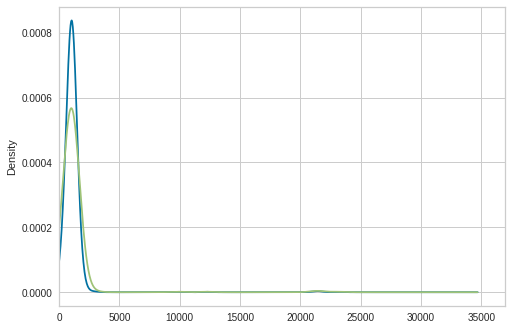

In [ ]:
X_train['wip2'] = X_train['wip'].copy();
X_train.loc[X_train['wip2'].isna(),'wip2'] = int(X_train['wip2'].median());
X_train['wip2'].plot.kde().set_xlim(left=-5);
X_train['wip'].plot.kde().set_xlim(left=-5);
'Media:', X_train['wip2'].mean(), 'Varianza:', X_train['wip2'].std()

In [ ]:
X_train.drop(columns=['wip'], inplace=True)
X_train = X_train.rename(columns={'wip2':'wip'})

#### Eliminación de variables irrelevantes/Creación de nuevas variables

In [ ]:
months = []

date_array = np.array(X_train["date"])
for i in range(len(X_train["date"])):
  data = date_array[i].split('/')
  months.append(data[0])

In [ ]:
X_train["month"] = months
X_train.drop(columns="date", inplace=True)

###### Binarización de las variables categóricas

In [ ]:
for col in ["quarter", "department", "day", "month", "no_of_style_change"]:
    X_train[col] = X_train[col].astype('category').cat.codes
    dummies = pd.get_dummies(X_train[col], drop_first=False, prefix=col, prefix_sep='_')
    X_train = pd.concat([X_train,dummies], axis=1)
    X_train.drop(columns=[col], inplace=True)
    X_train.head()

In [ ]:
X_train.head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_workers,wip,quarter_0,...,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
26,8,0.8,26.16,7080,50,0.0,0,59,1261.0,1,...,0,0,0,0,1,0,0,1,0,0
249,6,0.8,11.61,5670,38,0.0,0,32,972.0,0,...,0,0,0,1,1,0,0,1,0,0
773,11,0.6,2.90,1200,0,0.0,0,10,1040.0,0,...,1,0,0,0,0,1,0,1,0,0
696,3,0.8,22.52,0,88,0.0,0,57,813.0,0,...,0,0,1,0,0,1,0,1,0,0
1167,2,0.7,16.10,5400,40,0.0,0,45,957.0,0,...,0,0,1,0,0,0,1,0,1,0


#### Análisis y tratamiento de outliers

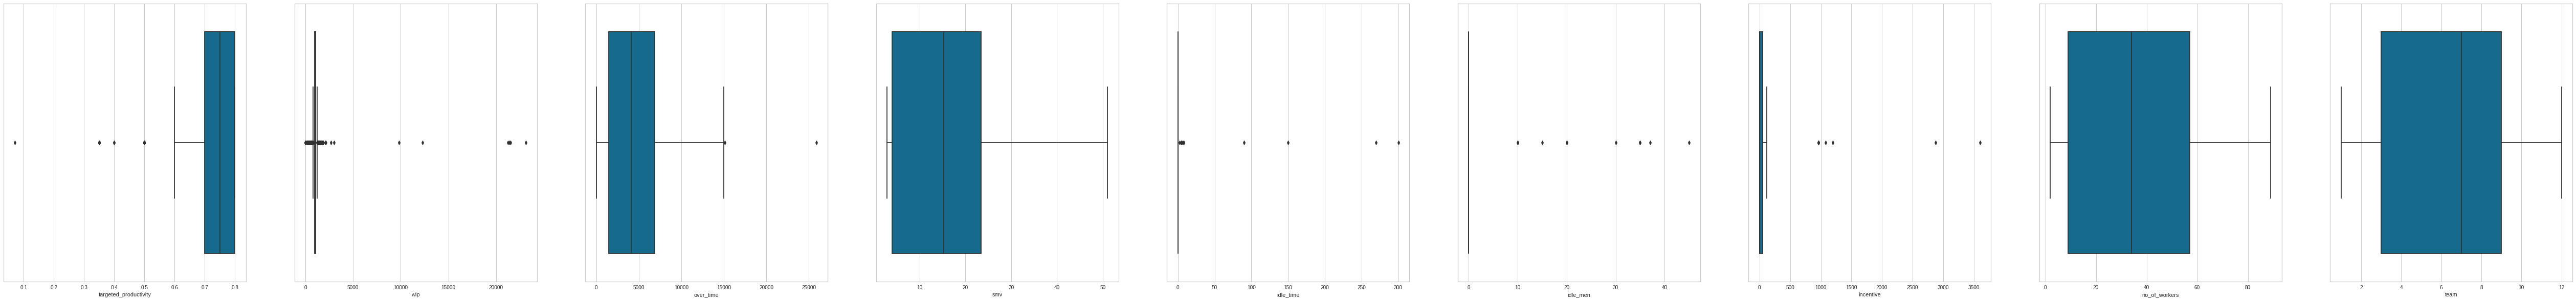

In [ ]:
numeric_cols = ["targeted_productivity", "wip", "over_time", "smv",  "idle_time", "idle_men", "incentive", "no_of_workers", "team"]
n = len(numeric_cols)
fig, ax = plt.subplots(1, n, figsize=(90,10))
for i in range(n):
  sns.boxplot(data=X_train, x=numeric_cols[i], ax=ax[i]);

In [ ]:
quantiles  = []
for col in numeric_cols:
  Q1 = X_train[col].quantile(0.25)
  Q3 = X_train[col].quantile(0.75)
  IQR = Q3 - Q1
  quantiles.append((Q1,Q3))

  small_outliers = X_train[col] < (Q1 - 1.5 * IQR)
  big_outliers = X_train[col] > (Q3 + 1.5 * IQR)
  X_train[col][small_outliers] = Q1
  X_train[col][big_outliers] = Q3

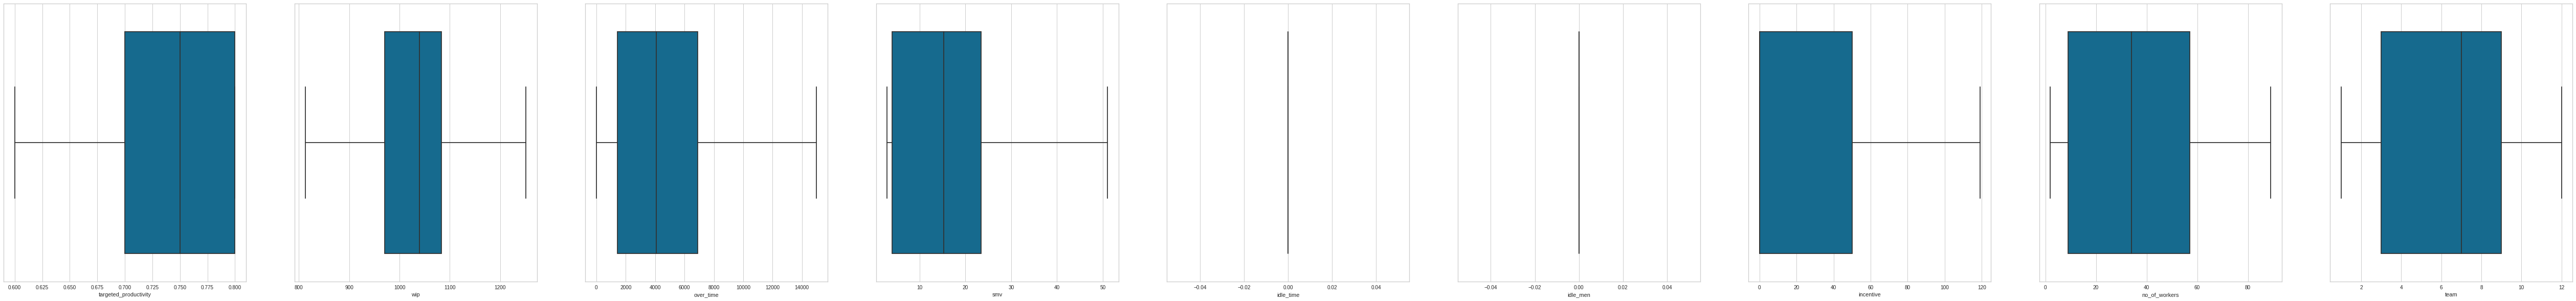

In [ ]:
n = len(numeric_cols)
fig, ax = plt.subplots(1, n, figsize=(90,10))
for i in range(n):
  sns.boxplot(data=X_train, x=numeric_cols[i], ax=ax[i]);

In [ ]:
X_train.drop(columns=["idle_time", "idle_men"],inplace=True)
aux_q, aux_cols = [], []
for i in range(len(numeric_cols)):
  if numeric_cols[i] != "idle_time" and numeric_cols[i] != "idle_men":
    aux_cols.append(numeric_cols[i])
    aux_q.append(quantiles[i])
numeric_cols  = aux_cols
quantiles = aux_q

#### Corrección de asimetrías y/o curtosis

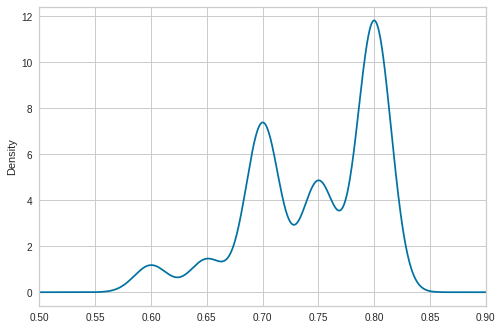

In [ ]:
X_train["targeted_productivity"].plot.kde().set_xlim(left=0.5, right=0.9);

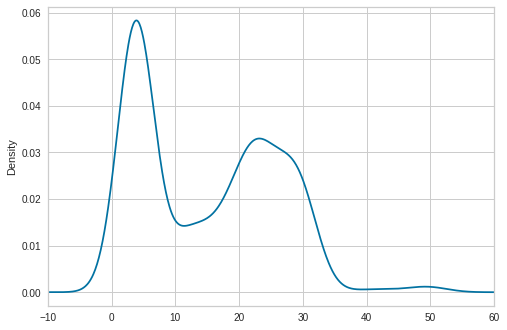

In [ ]:
X_train["smv"].plot.kde().set_xlim(left=-10, right=60);

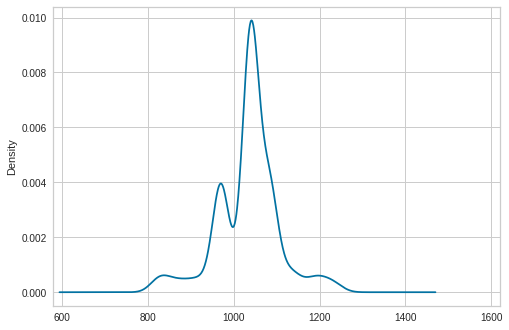

In [ ]:
X_train["wip"].plot.kde().set_xlim(left=580, right=1620);

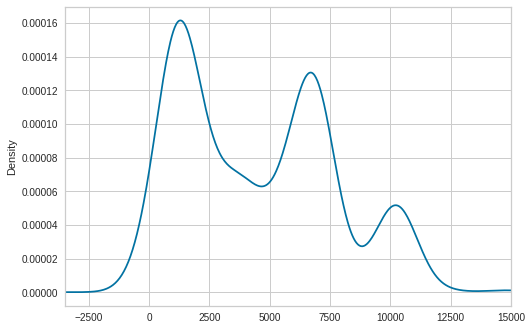

In [ ]:
X_train["over_time"].plot.kde().set_xlim(left=-3500, right=15000);

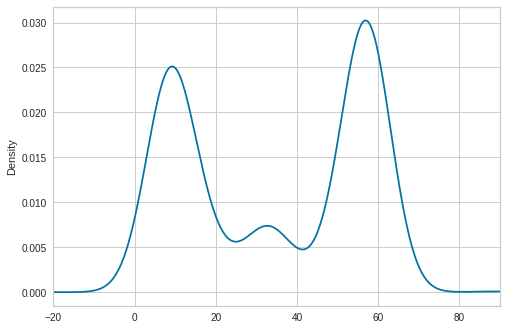

In [ ]:
X_train["no_of_workers"].plot.kde().set_xlim(left=-20, right=90);

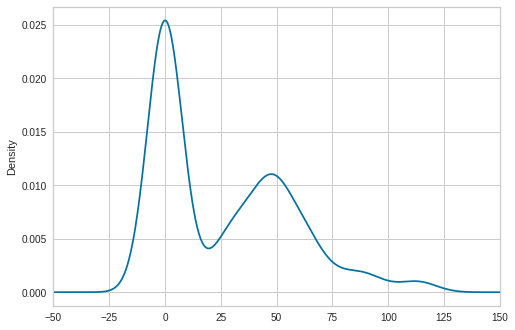

In [ ]:
X_train["incentive"].plot.kde().set_xlim(left=-50, right=150);

In [ ]:
kurtosis(X_train[numeric_cols], fisher=True), skew(X_train[numeric_cols])

(array([-0.29436253,  1.62014836, -0.87009649, -0.80392275, -0.19498369,
        -1.77208916, -1.18707967]),
 array([-7.60460549e-01, -2.79779313e-01,  4.33575092e-01,  4.03895444e-01,
         8.19362481e-01, -1.12856076e-01,  3.75726065e-05]))

In [ ]:
yj_power = PowerTransformer(method='yeo-johnson')

power_transform  = []
numeric_cols = ["targeted_productivity", "over_time", "smv", "incentive"]
for col in numeric_cols:
  transform = yj_power.fit(X_train[col].values.reshape(-1, 1))
  power_transform.append(transform)
  X_train[col] = transform.transform(X_train[col].values.reshape(-1, 1))

In [ ]:
kurtosis(X_train[numeric_cols], fisher=True), skew(X_train[numeric_cols])

(array([-1.46594926, -0.79127954, -1.66335758, -1.93648706]),
 array([-0.23459176, -0.2527971 , -0.07409771,  0.04907345]))

#### Normalización de variables

In [ ]:
numeric_cols = ["targeted_productivity", "wip", "over_time", "smv", "incentive", "no_of_workers", "team"]
scaler = MinMaxScaler().fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [ ]:
X_train.describe()

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,...,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,...,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.493212,0.645661,0.399842,0.517979,0.414292,0.375548,0.503036,0.311828,0.289128,0.158901,...,0.174432,0.157706,0.167264,0.181601,0.440860,0.366786,0.192354,0.881720,0.093190,0.025090
std,0.309705,0.345904,0.299800,0.214631,0.418317,0.255026,0.165263,0.463517,0.453628,0.365802,...,0.379708,0.364683,0.373435,0.385746,0.496787,0.482216,0.394385,0.323132,0.290872,0.156491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.315092,0.074750,0.327653,0.000000,0.080460,0.358447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.545455,0.593575,0.498646,0.539634,0.000000,0.367816,0.518265,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.727273,1.000000,0.663101,0.692662,0.834535,0.632184,0.616438,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Preprocesamiento del conjunto de test

In [ ]:
X_test['department'].mask(X_test['department'] == 'finishing ', "finishing", inplace=True)
X_test["no_of_workers"] = np.array(map(lambda x: math.ceil(x), X_test["no_of_workers"]))
X_test["no_of_workers"] = pd.to_numeric(X_test["no_of_workers"])
y_test = y_test.apply(correctAnomals)

In [ ]:
months = []

date_array = np.array(X_test["date"])
for i in range(len(X_test["date"])):
  data = date_array[i].split('/')
  months.append(data[0])

In [ ]:
X_test["month"] = months
X_test.drop(columns="date", inplace=True)

In [ ]:
for col in ["quarter", "department", "day", "month", "no_of_style_change"]:
  X_test[col] = X_test[col].astype('category').cat.codes
  dummies = pd.get_dummies(X_test[col], drop_first=False, prefix=col, prefix_sep='_')
  X_test = pd.concat([X_test,dummies], axis=1)
  X_test.drop(columns=[col], inplace=True)
  X_test.head()

In [ ]:
X_test['wip2'] = X_test['wip'].copy();
X_test.loc[X_test['wip2'].isna(),'wip2'] = int(X_test['wip2'].mean());

X_test.drop(columns=['wip'], inplace=True)
X_test = X_test.rename(columns={'wip2':'wip'})

In [ ]:
X_test.drop(columns=["idle_time", "idle_men"],inplace=True)

In [ ]:
for i in range(len(quantiles)):
  col = numeric_cols[i]
  Q1, Q3 = quantiles[i][0], quantiles[i][1]
  IQR = Q3 - Q1
  quantiles.append((Q1,Q3))

  small_outliers = X_test[col] < (Q1 - 1.5 * IQR)
  big_outliers = X_test[col] > (Q3 + 1.5 * IQR)
  X_test[col][small_outliers] = Q1
  X_test[col][big_outliers] = Q3

In [ ]:
numeric_cols = ["targeted_productivity", "over_time", "smv", "incentive"]
for i in range(len(numeric_cols)):
  col = numeric_cols[i]
  X_test[col] = power_transform[i].transform(X_test[col].values.reshape(-1, 1))

In [ ]:
numeric_cols = ["targeted_productivity", "wip", "over_time", "smv", "incentive", "no_of_workers", "team"]
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#### PCA y TSNE

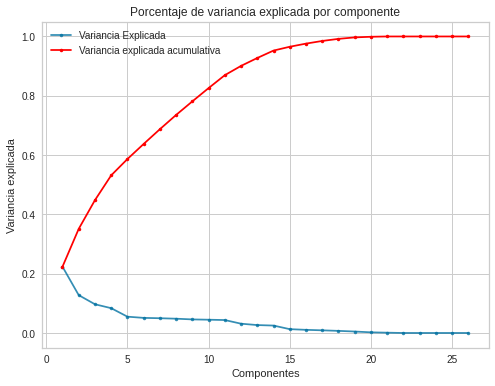

In [ ]:
myPCA = PCA().fit(X_train);

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

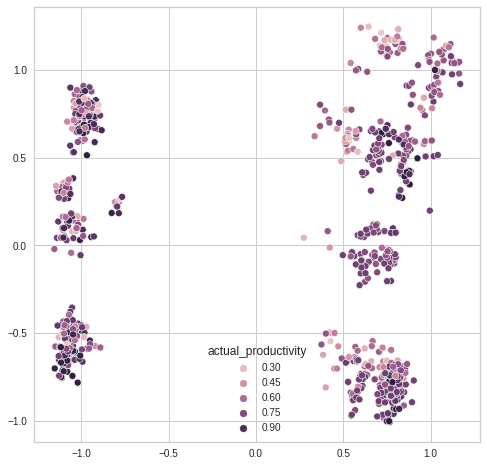

In [ ]:
X_trans = myPCA.transform(X_train)
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train);

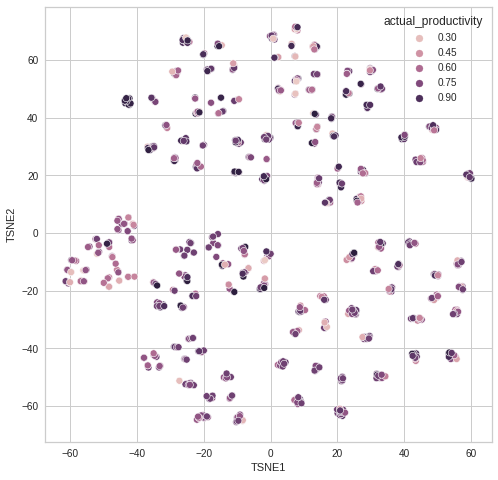

In [ ]:
train = X_train.copy()
workers_tsne = TSNE(n_components=2, perplexity=10,n_iter=1000, init='random').fit_transform(train)
train[['TSNE1','TSNE2',]]=workers_tsne

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=y_train, data=train);

### Modelos lineales

In [ ]:
cv = 5
niter = 20
maxiter = 2500

#### Regresión lineal

In [ ]:
lr = LinearRegression();

lr.fit(X_train,y_train);
print('Error de entrenamiento con validacion cruzada:', np.mean(cross_val_score(lr, X_train,y_train, cv=cv, scoring='r2')))

Error de entrenamiento con validacion cruzada: 0.29360805059023837


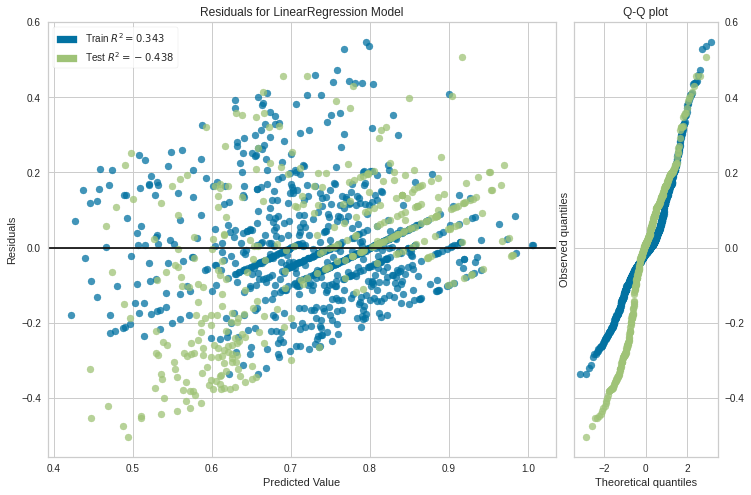

In [ ]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

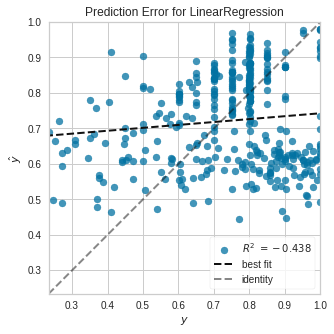

In [ ]:
plt.figure(figsize=(5,5))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

<function matplotlib.pyplot.show(close=None, block=None)>

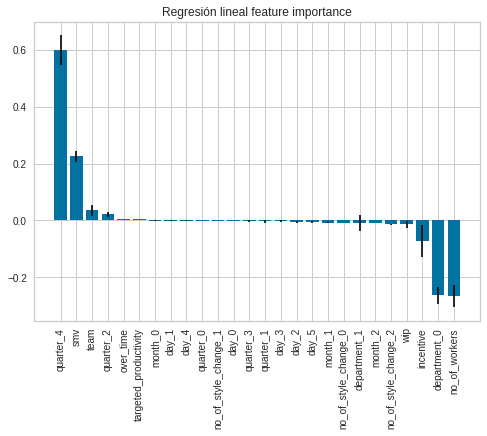

In [ ]:
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=0)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title('Regresión lineal feature importance')
plt.bar(range(X_train.shape[1]),
        result['importances_mean'][indices],
        yerr=result['importances_std'][indices])

feature_names = np.array(list(X_train.columns))
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
plt.show

#### Ridge regression

In [ ]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100,200]
ridge_cv =RidgeCV(alphas=lambdas,cv=cv).fit(X_train,y_train)
print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 1.0 R2 score: 0.295


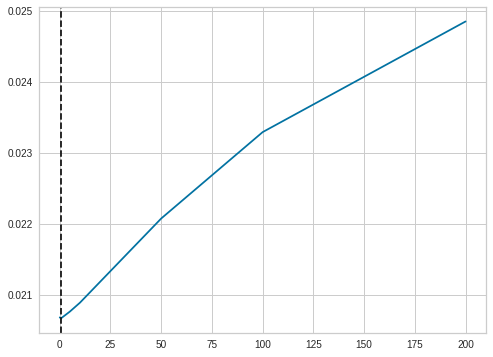

In [ ]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(RidgeCV(alphas=lambdas));
vis.fit(X_train, y_train);

Error para el conjunto de test: -0.3231622617144918


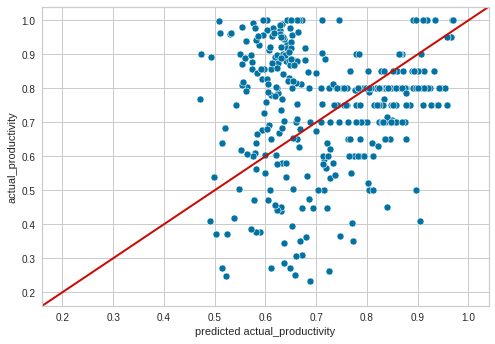

In [ ]:
sns.scatterplot(ridge_cv.predict(X_test), y_test)
plt.axline((0.2, 0.2), (1, 1), linewidth=2, color='r')
plt.xlabel("predicted actual_productivity")
print('Error para el conjunto de test:', ridge_cv.score(X_test, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

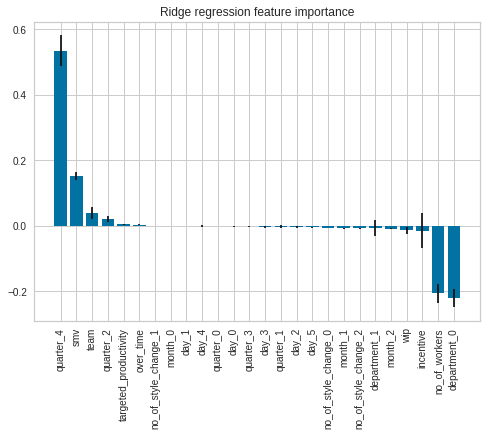

In [ ]:
result = permutation_importance(ridge_cv, X_test, y_test, n_repeats=10, random_state=0)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title('Ridge regression feature importance')
plt.bar(range(X_train.shape[1]),
        result['importances_mean'][indices],
        yerr=result['importances_std'][indices])

feature_names = np.array(list(X_train.columns))
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
plt.show

#### SVM con kernel cuadrático

In [ ]:
param = {'C':10**np.linspace(-5,5,201), 'degree':[2],  'gamma':['scale','auto']}

lsvr =  SVR(kernel='poly', max_iter=maxiter)
lsvr_bs = BayesSearchCV(lsvr,param,n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0)

lsvr_bs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(lsvr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2,"{'C': 1.9952623149688828, 'degree': 2, 'gamma': 'auto'}",0.287089,1
12,"{'C': 2.818382931264455, 'degree': 2, 'gamma': 'auto'}",0.285537,2
17,"{'C': 8.91250938133746, 'degree': 2, 'gamma': 'auto'}",0.273867,3
7,"{'C': 1.2589254117941688, 'degree': 2, 'gamma': 'scale'}",0.236882,4
0,"{'C': 1.9952623149688828, 'degree': 2, 'gamma': 'scale'}",0.222260,5


Error para el conjunto de test: -0.2216018463951357


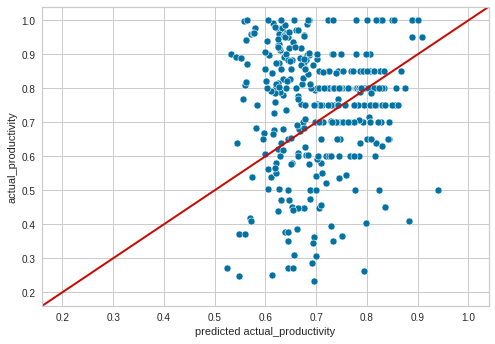

In [ ]:
sns.scatterplot(lsvr_bs.predict(X_test), y_test)
plt.axline((0.2, 0.2), (1, 1), linewidth=2, color='r')
plt.xlabel("predicted actual_productivity")
print('Error para el conjunto de test:', lsvr_bs.score(X_test, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

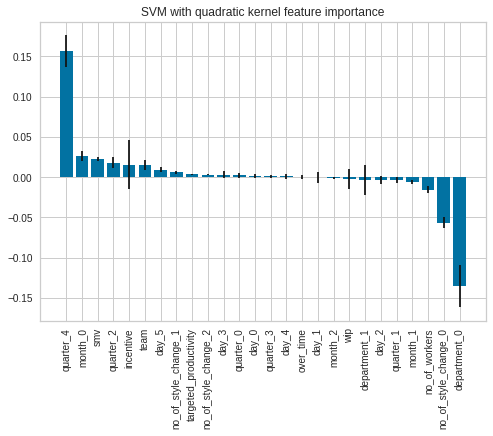

In [ ]:
result = permutation_importance(lsvr_bs, X_test, y_test, n_repeats=10, random_state=0)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title('SVM with quadratic kernel feature importance')
plt.bar(range(X_train.shape[1]),
        result['importances_mean'][indices],
        yerr=result['importances_std'][indices])

feature_names = np.array(list(X_train.columns))
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
plt.show

### Modelos no lineales

#### SVM con kernel rbf

In [ ]:
param = {'C':10**np.linspace(-5,5,201), 'gamma':['scale','auto']}

rbsvc =  SVR(kernel='rbf', max_iter=maxiter)
rbsvc_bs = BayesSearchCV(rbsvc,param,n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0)
rbsvc_bs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(rbsvc_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2,"{'C': 1.9952623149688828, 'gamma': 'auto'}",0.284744,1
19,"{'C': 2.818382931264455, 'gamma': 'auto'}",0.282165,2
7,"{'C': 1.2589254117941688, 'gamma': 'scale'}",0.240472,3
0,"{'C': 1.9952623149688828, 'gamma': 'scale'}",0.216636,4
9,"{'C': 0.05011872336272725, 'gamma': 'auto'}",0.211523,5


Error para el conjunto de test: -0.6034474098791807


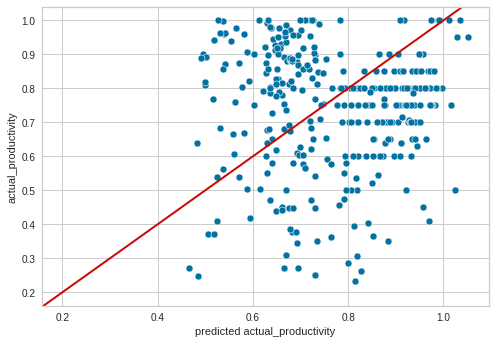

In [ ]:
sns.scatterplot(rbsvc_bs.predict(X_test), y_test)
plt.axline((0.2, 0.2), (1, 1), linewidth=2, color='r')
plt.xlabel("predicted actual_productivity")
print('Error para el conjunto de test:', rbsvc_bs.score(X_test, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

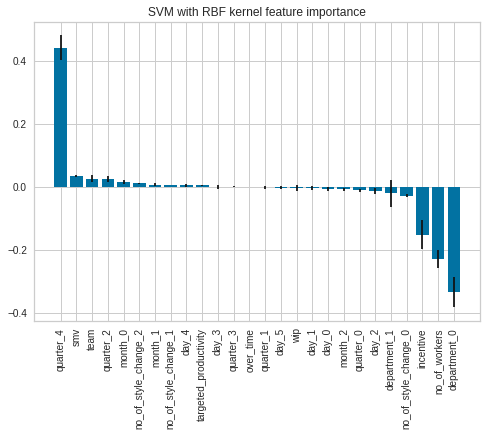

In [ ]:
result = permutation_importance(rbsvc_bs, X_test, y_test, n_repeats=10, random_state=0)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title('SVM with RBF kernel feature importance')
plt.bar(range(X_train.shape[1]),
        result['importances_mean'][indices],
        yerr=result['importances_std'][indices])

feature_names = np.array(list(X_train.columns))
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
plt.show

#### Random Forest

In [ ]:
param = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
         'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
         'max_depth':[None, 2, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80],
         'min_samples_leaf':[1, 2, 3, 4, 5, 10]}

rf =  RandomForestRegressor(random_state=0)
rf_bs = BayesSearchCV(rf,param,n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0)
rf_bs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(rf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
13,"{'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 90}",0.451234,1
12,"{'criterion': 'absolute_error', 'max_depth': 70, 'min_samples_leaf': 3, 'n_estimators': 90}",0.451233,2
8,"{'criterion': 'absolute_error', 'max_depth': 70, 'min_samples_leaf': 5, 'n_estimators': 90}",0.447876,3
11,"{'criterion': 'absolute_error', 'max_depth': 80, 'min_samples_leaf': 5, 'n_estimators': 90}",0.447876,3
3,"{'criterion': 'absolute_error', 'max_depth': 50, 'min_samples_leaf': 3, 'n_estimators': 50}",0.447605,5


Error para el conjunto de test: -0.6597638260247389


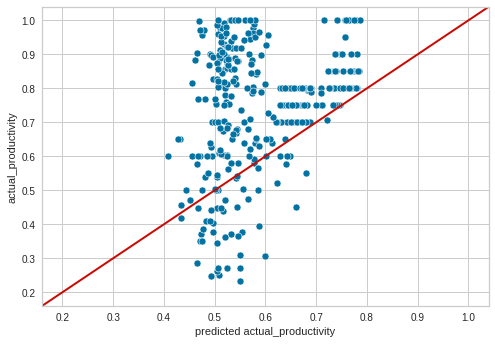

In [ ]:
sns.scatterplot(rf_bs.predict(X_test), y_test)
plt.axline((0.2, 0.2), (1, 1), linewidth=2, color='r')
plt.xlabel("predicted actual_productivity")
print('Error para el conjunto de test:', rf_bs.score(X_test, y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

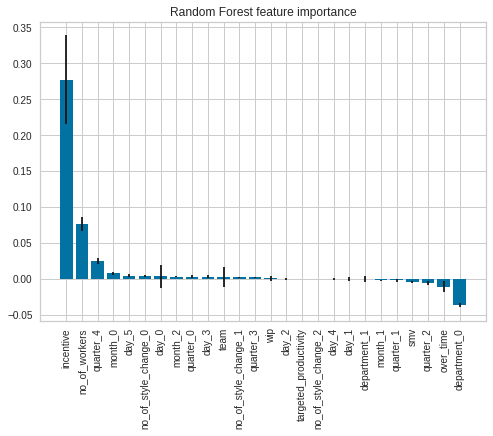

In [ ]:
result = permutation_importance(rf_bs, X_test, y_test, n_repeats=10, random_state=0)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title('Random Forest feature importance')
plt.bar(range(X_train.shape[1]),
        result['importances_mean'][indices],
        yerr=result['importances_std'][indices])

feature_names = np.array(list(X_train.columns))
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
plt.show

#### Perceptrón multicapa

In [ ]:
best_model = None
best_pred = None
best_error = np.Inf

for act in [('relu', 'sigmoid'), ('sigmoid', 'linear'), ('linear', 'sigmoid')]:
  for dimension in [(78, 54), (52,26), (26, 13)]:
    entrada = keras.Input(shape=(X_train.shape[1],))
    hiddenLayer1 = keras.layers.Dense(dimension[0], activation=act[0])(entrada)
    hiddenLayer2 = keras.layers.Dense(dimension[1], activation=act[0])(hiddenLayer1)
    salida = keras.layers.Dense(1, activation=act[1])(hiddenLayer2)

    dnn = keras.Model(entrada, salida)

    for BATCH_SIZE in [25, 50, 100]:
      for EPOCHS in [50, 100, 200]:
        dnn.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
        dnn.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0)
        y_pred = dnn.predict(X_test, verbose=0)

        new_error = mean_squared_error(y_test,y_pred)
        
        if new_error<best_error:
          print("BATCH_SIZE:", BATCH_SIZE, "; EPOCHS:", EPOCHS, "; con error:", new_error)
          best_error = new_error
          best_model = dnn
          best_pred = y_pred

BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.047644921540317735
BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.042031096735138204
BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.03485083524538617
BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.0333860634197332
BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.03317467327023045
BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.03268019465965288
BATCH_SIZE: 25 ; EPOCHS: 100 ; con error: 0.03264831194212941
BATCH_SIZE: 25 ; EPOCHS: 50 ; con error: 0.029281085154685357


In [ ]:
print( 'Error de train:', r2_score( y_train, best_model.predict(X_train) ) ) 
print( 'Error de test:', r2_score(y_test, best_pred) )

27/27 [==============================] - 0s 1ms/step
Error de train: 0.33998897060944666
Error de test: 0.029040435215772487


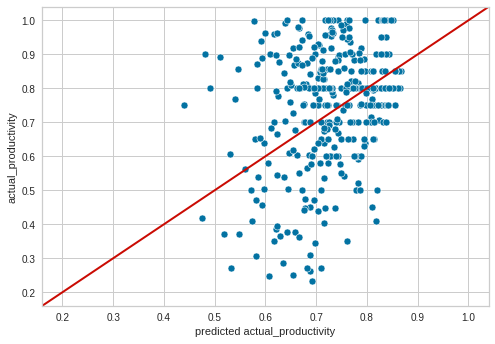

In [ ]:
best_pred = best_pred.reshape((best_pred.shape[0],))
sns.scatterplot(best_pred, y_test)
plt.axline((0.2, 0.2), (1, 1), linewidth=2, color='r')
plt.xlabel("predicted actual_productivity");

In [ ]:
result = permutation_importance(best_model,  X_test, y_test, n_repeats=10, scoring = 'r2', random_state=0)

12/12 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

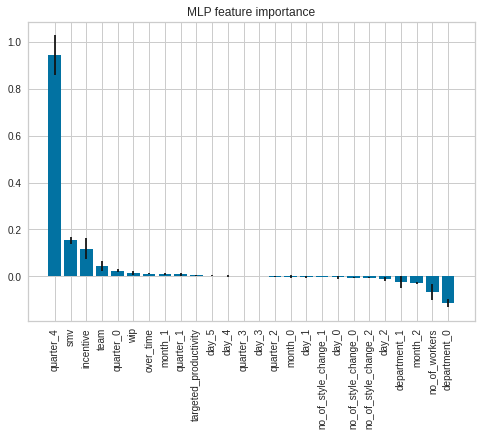

In [ ]:
indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title('MLP feature importance')
plt.bar(range(X_train.shape[1]),
        result['importances_mean'][indices],
        yerr=result['importances_std'][indices])

feature_names = np.array(list(X_train.columns))
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
plt.show

### Explicación de un modelo lineal/no lineal

In [ ]:
y_train_cp = np.array(y_train.copy())
y_test_cp = np.array(y_test.copy())

#### Modelo lineal: Regresión lineal

In [ ]:
lr_train_preds = lr.predict(X_train)

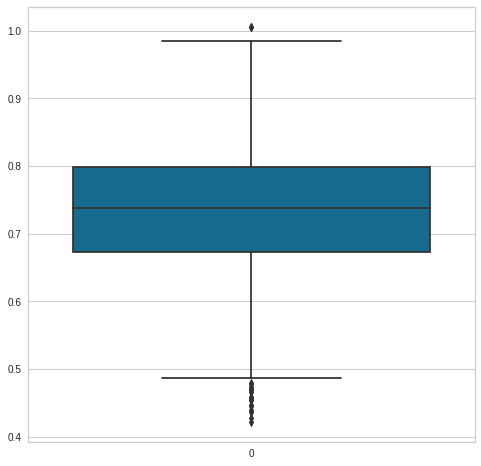

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.boxplot(data=lr_train_preds, ax=ax);

In [ ]:
Q1 = np.quantile(lr_train_preds, 0.25)
Q3 = np.quantile(lr_train_preds, 0.75)
IQR = Q3 - Q1

In [ ]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

##### Ejemplos con valores atípicos

In [ ]:
lr_upper_atipical_values = np.where(lr_train_preds>(Q3 + 1.5 * IQR))[0]
lr_lower_atipical_values = np.where(lr_train_preds<(Q1 - 1.5 * IQR))[0]
len(lr_upper_atipical_values), len(lr_lower_atipical_values)

(2, 17)

In [ ]:
lr_upper_atipical_values_error = abs(lr_train_preds[lr_upper_atipical_values] - y_train_cp[lr_upper_atipical_values])
lr_upper_atipical_values_error

array([0.00584252, 0.00539596])

In [ ]:
X_train.iloc[lr_upper_atipical_values]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
518,0.181818,1.0,0.64761,0.695511,0.990234,0.643678,0.737443,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
519,0.090909,1.0,0.64761,0.689800,0.990234,0.632184,0.616438,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
lr_lower_atipical_values_error = abs(lr_train_preds[lr_lower_atipical_values] - y_train_cp[lr_lower_atipical_values])
np.random.shuffle(lr_lower_atipical_values_error) 
lr_lower_atipical_values_error.max(), lr_lower_atipical_values_error.min(), lr_lower_atipical_values_error[:5]

(0.22862605043169998,
 0.002557644026485062,
 array([0.20513269, 0.15203585, 0.17854776, 0.22862605, 0.17913734]))

In [ ]:
lr_low_error_atipical_values = np.where(abs(lr_train_preds[lr_lower_atipical_values]-y_train_cp[lr_lower_atipical_values])<0.05)[0]
X_train.iloc[lr_low_error_atipical_values]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
660,0.000000,1.0,0.07475,0.300028,0.0,0.091954,0.518265,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
101,0.636364,1.0,0.00000,0.327653,0.0,0.068966,0.518265,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
lr_high_error_atipical_values = np.where(abs(lr_train_preds[lr_lower_atipical_values]-y_train_cp[lr_lower_atipical_values])>0.2)[0]
X_train.iloc[lr_high_error_atipical_values]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
26,0.636364,1.000000,0.708151,0.701170,0.834535,0.655172,0.616438,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
249,0.454545,1.000000,0.401152,0.631051,0.781526,0.344828,0.363014,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
225,0.363636,0.126381,0.088216,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
531,0.454545,0.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0


##### Ejemplos con valores extremos

In [ ]:
lr_upper_extreme_values = np.where(np.logical_and(lr_train_preds<(Q3 + 1.5 * IQR), lr_train_preds>Q3))[0]
lr_lower_extreme_values = np.where(np.logical_and(lr_train_preds>(Q1 - 1.5 * IQR), lr_train_preds<Q1))[0]
len(lr_upper_extreme_values), len(lr_lower_extreme_values)

(207, 192)

In [ ]:
lr_upper_extreme_values_errors = abs(lr_train_preds[lr_upper_extreme_values] - y_train_cp[lr_upper_extreme_values])
np.random.shuffle(lr_upper_extreme_values_errors)
lr_upper_extreme_values_errors.max(), lr_upper_extreme_values_errors.min(), lr_upper_extreme_values_errors[:5]

(0.5353824259663469,
 0.0001463297134162156,
 array([0.12141638, 0.05134478, 0.00831818, 0.05914216, 0.03538341]))

In [ ]:
lr_low_error_upper_extreme_values = np.where(abs(lr_train_preds[lr_upper_extreme_values]-y_train_cp[lr_upper_extreme_values])<0.05)[0]
np.random.shuffle(lr_low_error_upper_extreme_values)
X_train.iloc[lr_low_error_upper_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
968,0.545455,1.000000,0.766459,0.252335,0.781526,0.655172,0.358447,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
578,0.454545,0.000000,0.000000,0.300028,0.000000,0.091954,0.518265,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
745,0.727273,1.000000,0.752560,0.695511,0.000000,0.643678,0.358447,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1115,0.181818,1.000000,0.766459,0.491930,0.834535,0.632184,0.616438,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
577,0.545455,0.315092,0.677461,0.684035,0.000000,0.620690,0.616438,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
804,0.818182,1.000000,0.074750,0.269266,0.000000,0.068966,0.518265,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
805,0.545455,0.315092,0.145563,0.300028,0.000000,0.091954,0.518265,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
46,0.545455,1.000000,0.704060,0.698347,0.869611,0.632184,0.945205,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
388,0.636364,1.000000,0.900370,0.855179,0.735725,0.632184,0.381279,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
717,0.363636,0.315092,0.088216,0.135817,0.000000,0.000000,0.518265,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
lr_big_error_upper_extreme_values = np.where(abs(lr_train_preds[lr_upper_extreme_values]-y_train_cp[lr_upper_extreme_values])>0.4)[0]
X_train.iloc[lr_big_error_upper_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
605,0.000000,1.000000,0.647610,0.692662,0.942827,0.643678,0.616438,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
200,0.545455,1.000000,0.704060,0.832315,0.869611,0.632184,0.497717,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
751,0.272727,0.593575,0.088216,0.418836,0.000000,0.206897,0.518265,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
lr_lower_extreme_values_errors = abs(lr_train_preds[lr_lower_extreme_values] - y_train_cp[lr_lower_extreme_values])
np.random.shuffle(lr_lower_extreme_values_errors)
lr_lower_extreme_values_errors.max(), lr_lower_extreme_values_errors.min(), lr_lower_extreme_values_errors[:5]

(0.41127925962045386,
 0.004153338619803937,
 array([0.03949495, 0.24503244, 0.21915594, 0.33679672, 0.01035208]))

In [ ]:
lr_low_error_lower_extreme_values = np.where(abs(lr_train_preds[lr_lower_extreme_values]-y_train_cp[lr_lower_extreme_values])<0.05)[0]
np.random.shuffle(lr_low_error_lower_extreme_values)
X_train.iloc[lr_low_error_lower_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
991,0.727273,0.593575,0.576811,0.660406,0.759987,0.574713,0.187215,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
444,0.454545,1.000000,0.401152,0.635787,0.834535,0.344828,0.591324,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
279,0.090909,1.000000,0.074750,0.364826,0.000000,0.091954,0.518265,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
57,0.636364,1.000000,0.000000,0.269266,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
938,0.363636,1.000000,0.766459,0.300028,0.830640,0.655172,0.358447,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
702,0.454545,0.593575,0.576811,0.418836,0.000000,0.367816,0.358447,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
87,0.727273,1.000000,0.074750,0.327653,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
376,0.818182,0.593575,0.647610,0.828824,0.852887,0.620690,0.616438,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
126,0.000000,1.000000,0.074750,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
138,1.000000,1.000000,0.401152,0.692662,0.878975,0.344828,0.358447,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
lr_big_error_lower_extreme_values = np.where(abs(lr_train_preds[lr_lower_extreme_values]-y_train_cp[lr_lower_extreme_values])>0.3)[0]
np.random.shuffle(lr_big_error_lower_extreme_values)
X_train.iloc[lr_big_error_lower_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
626,0.000000,1.000000,0.074750,0.327653,0.000000,0.114943,0.518265,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1186,0.000000,0.593575,0.718392,0.701170,0.814210,0.655172,0.616438,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
669,0.454545,0.593575,0.000000,0.269266,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
481,0.090909,1.000000,0.074750,0.364826,0.000000,0.149425,0.518265,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0
167,0.636364,1.000000,0.000000,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
745,0.727273,1.000000,0.752560,0.695511,0.000000,0.643678,0.358447,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
476,0.909091,0.315092,0.973549,0.672337,0.684185,0.597701,0.616438,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
100,0.909091,0.593575,0.587319,0.821791,0.814210,0.609195,0.358447,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
171,0.272727,1.000000,0.074750,0.508388,0.000000,0.206897,0.518265,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
467,0.000000,0.593575,0.654980,0.695511,0.852887,0.643678,0.616438,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0


##### Ejemplos con valores máximos/mínimos para el valor de la variable objetivo

In [ ]:
maximum_values = np.where(y_test_cp>0.9999)[0]
minimum_values = np.where(y_test_cp<0.38)[0]
np.random.shuffle(maximum_values)
np.random.shuffle(minimum_values)
len(maximum_values), len(minimum_values)

(18, 19)

In [ ]:
lr_maximum_values_errors = abs(lr_train_preds[maximum_values] - y_train_cp[maximum_values])
np.random.shuffle(lr_maximum_values_errors)
lr_maximum_values_errors.max(), lr_maximum_values_errors.min(), lr_maximum_values_errors[:5]

(0.24288216651953298,
 0.0051432346171153,
 array([0.02460875, 0.03573792, 0.05554702, 0.13869549, 0.11342576]))

In [ ]:
lr_minimum_error_maxim_values = np.where(abs(lr_train_preds[maximum_values]-y_train_cp[maximum_values])<0.05)[0]
np.random.shuffle(lr_minimum_error_maxim_values)
X_train.iloc[lr_minimum_error_maxim_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
531,0.454545,0.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
991,0.727273,0.593575,0.576811,0.660406,0.759987,0.574713,0.187215,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
696,0.181818,1.000000,0.647610,0.000000,0.942827,0.632184,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
528,0.545455,0.315092,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
225,0.363636,0.126381,0.088216,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
26,0.636364,1.000000,0.708151,0.701170,0.834535,0.655172,0.616438,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
375,0.454545,1.000000,0.401152,0.666402,0.878975,0.344828,0.324201,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
lr_max_error_maxim_values = np.where(abs(lr_train_preds[maximum_values]-y_train_cp[maximum_values])>0.15)[0]
np.random.shuffle(lr_max_error_maxim_values)
X_train.iloc[lr_max_error_maxim_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
1167,0.090909,0.315092,0.518447,0.616595,0.791449,0.494253,0.328767,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
546,0.181818,1.000000,0.647610,0.689800,0.967105,0.632184,0.710046,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
635,0.636364,0.315092,0.677461,0.689800,0.000000,0.632184,0.808219,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
lr_minimum_values_errors = abs(lr_train_preds[minimum_values] - y_train_cp[minimum_values])
np.random.shuffle(lr_minimum_values_errors)
lr_minimum_values_errors.max(), lr_minimum_values_errors.min(), lr_minimum_values_errors[:5]

(0.2703999034932877,
 0.005128606760577026,
 array([0.05070073, 0.13967091, 0.01363465, 0.12141638, 0.07136322]))

In [ ]:
lr_min_error_min_values = np.where(abs(lr_train_preds[minimum_values]-y_train_cp[minimum_values])<0.05)[0]
np.random.shuffle(lr_min_error_min_values)
X_train.iloc[lr_min_error_min_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
26,0.636364,1.000000,0.708151,0.701170,0.834535,0.655172,0.616438,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
531,0.454545,0.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
101,0.636364,1.000000,0.000000,0.327653,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
341,0.272727,0.315092,0.647610,0.835790,0.878975,0.632184,0.388128,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
225,0.363636,0.126381,0.088216,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
696,0.181818,1.000000,0.647610,0.000000,0.942827,0.632184,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1167,0.090909,0.315092,0.518447,0.616595,0.791449,0.494253,0.328767,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
lr_max_error_min_values = np.where(abs(lr_train_preds[minimum_values]-y_train_cp[minimum_values])>0.15)[0]
np.random.shuffle(lr_max_error_min_values)
X_train.iloc[lr_max_error_min_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
388,0.636364,1.000000,0.900370,0.855179,0.735725,0.632184,0.381279,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
375,0.454545,1.000000,0.401152,0.666402,0.878975,0.344828,0.324201,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
528,0.545455,0.315092,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
635,0.636364,0.315092,0.677461,0.689800,0.000000,0.632184,0.808219,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


#### Modelo no lineal: Random Forest

In [ ]:
rf_train_preds = rf_bs.predict(X_train)

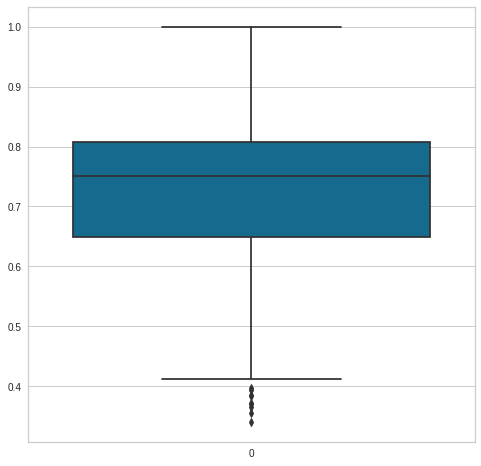

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.boxplot(data=rf_train_preds, ax=ax);

In [ ]:
Q1 = np.quantile(rf_train_preds, 0.25)
Q3 = np.quantile(rf_train_preds, 0.75)
IQR = Q3 - Q1

##### Ejemplos con valores atípicos

In [ ]:
rf_lower_atipical_values = np.where(rf_train_preds<(Q1 - 1.5 * IQR))[0]
np.random.shuffle(rf_lower_atipical_values)
len(rf_lower_atipical_values)

9

In [ ]:
rf_lower_atipical_values_error = abs(rf_train_preds[rf_lower_atipical_values] - y_train_cp[rf_lower_atipical_values])
np.random.shuffle(rf_lower_atipical_values_error)
rf_lower_atipical_values_error.max(), rf_lower_atipical_values_error.min(), rf_lower_atipical_values_error[:5]

(0.13446848216666665,
 0.015141571577777735,
 array([0.09041285, 0.02587291, 0.10397162, 0.1138517 , 0.01514157]))

In [ ]:
lr_low_error_atipical_values = np.where(abs(rf_train_preds[rf_lower_atipical_values]-y_train_cp[rf_lower_atipical_values])<0.05)[0]
X_train.iloc[lr_low_error_atipical_values]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
249,0.454545,1.000000,0.401152,0.631051,0.781526,0.344828,0.363014,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
1167,0.090909,0.315092,0.518447,0.616595,0.791449,0.494253,0.328767,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
528,0.545455,0.315092,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
225,0.363636,0.126381,0.088216,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
rf_high_error_atipical_values = np.where(abs(rf_train_preds[rf_lower_atipical_values]-y_train_cp[rf_lower_atipical_values])>0.1)[0]
X_train.iloc[rf_high_error_atipical_values]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
26,0.636364,1.0,0.708151,0.701170,0.834535,0.655172,0.616438,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
696,0.181818,1.0,0.647610,0.000000,0.942827,0.632184,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
531,0.454545,0.0,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0


##### Ejemplos con valores extremos

In [ ]:
rf_upper_extreme_values = np.where(np.logical_and(rf_train_preds<(Q3 + 1.5 * IQR), rf_train_preds>Q3))[0]
rf_lower_extreme_values = np.where(np.logical_and(rf_train_preds>(Q1 - 1.5 * IQR), rf_train_preds<Q1))[0]
np.random.shuffle(rf_upper_extreme_values)
np.random.shuffle(rf_lower_extreme_values)
len(rf_upper_extreme_values), len(rf_lower_extreme_values)

(209, 200)

In [ ]:
rf_upper_extreme_values_errors = abs(rf_train_preds[rf_upper_extreme_values] - y_train_cp[rf_upper_extreme_values])
np.random.shuffle(rf_upper_extreme_values_errors)
rf_upper_extreme_values_errors.max(), rf_upper_extreme_values_errors.min(), rf_upper_extreme_values_errors[:5]

(0.15446139462777742,
 0.0,
 array([0.00103103, 0.00554517, 0.00612971, 0.12128815, 0.00376129]))

In [ ]:
rf_low_error_upper_extreme_values = np.where(abs(rf_train_preds[rf_upper_extreme_values]-y_train_cp[rf_upper_extreme_values])<0.05)[0]
np.random.shuffle(rf_low_error_upper_extreme_values)
X_train.iloc[rf_low_error_upper_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
747,0.818182,1.000000,0.647610,0.648228,0.000000,0.551724,0.358447,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
933,0.636364,0.315092,0.756569,0.695511,0.735725,0.643678,0.077626,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
751,0.272727,0.593575,0.088216,0.418836,0.000000,0.206897,0.518265,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
97,0.636364,1.000000,0.704060,0.832315,0.781526,0.632184,0.616438,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
416,0.363636,0.315092,0.088216,0.470448,0.000000,0.172414,0.518265,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
404,0.454545,1.000000,0.401152,0.629463,0.878975,0.344828,0.447489,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
706,0.272727,0.315092,0.766459,0.698347,0.791449,0.643678,0.095890,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
200,0.545455,1.000000,0.704060,0.832315,0.869611,0.632184,0.497717,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
56,0.818182,0.315092,0.737391,0.692662,0.791449,0.643678,0.888128,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
395,0.636364,1.000000,0.000000,0.346792,0.000000,0.080460,0.518265,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
rf_high_error_upper_extreme_values = np.where(abs(rf_train_preds[rf_upper_extreme_values]-y_train_cp[rf_upper_extreme_values])>0.1)[0]
np.random.shuffle(rf_high_error_upper_extreme_values)
X_train.iloc[rf_high_error_upper_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
565,0.818182,1.000000,0.647610,0.684035,0.942827,0.620690,0.616438,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
388,0.636364,1.000000,0.900370,0.855179,0.735725,0.632184,0.381279,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
7,0.181818,0.593575,0.737391,0.692662,0.814210,0.643678,0.358447,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
577,0.545455,0.315092,0.677461,0.684035,0.000000,0.620690,0.616438,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1016,0.636364,0.593575,0.756569,0.689800,0.814210,0.632184,0.358447,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
892,0.454545,0.593575,0.576811,0.532015,0.814210,0.356322,0.655251,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
89,0.727273,1.000000,0.708151,0.849528,0.912353,0.655172,0.616438,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1043,0.818182,0.315092,0.000000,0.491930,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
11,0.818182,0.593575,0.587319,0.672337,0.814210,0.597701,0.358447,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
106,0.000000,1.000000,0.708151,0.849528,0.912353,0.655172,0.835616,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
rf_lower_extreme_values_errors = abs(rf_train_preds[rf_lower_extreme_values] - y_train_cp[rf_lower_extreme_values])
np.random.shuffle(rf_lower_extreme_values_errors)
rf_lower_extreme_values_errors.max(), rf_lower_extreme_values_errors.min(), rf_lower_extreme_values_errors[:5]

(0.3753880081944449,
 0.0001083121000001741,
 array([0.07303156, 0.00189499, 0.02279162, 0.06255957, 0.21942347]))

In [ ]:
rf_low_error_lower_extreme_values = np.where(abs(rf_train_preds[rf_lower_extreme_values]-y_train_cp[rf_lower_extreme_values])<0.05)[0]
np.random.shuffle(rf_low_error_lower_extreme_values)
X_train.iloc[rf_low_error_lower_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
595,0.545455,0.315092,0.677461,0.684035,0.000000,0.620690,0.616438,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
577,0.545455,0.315092,0.677461,0.684035,0.000000,0.620690,0.616438,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
643,0.454545,0.593575,0.000000,0.269266,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
786,0.727273,1.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
626,0.000000,1.000000,0.074750,0.327653,0.000000,0.114943,0.518265,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
324,1.000000,1.000000,0.000000,0.327653,0.000000,0.068966,0.518265,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
294,0.181818,0.000000,0.647610,0.832315,0.735725,0.632184,0.746575,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
106,0.000000,1.000000,0.708151,0.849528,0.912353,0.655172,0.835616,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
921,0.000000,0.000000,0.647787,0.596708,0.000000,0.459770,0.358447,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1186,0.000000,0.593575,0.718392,0.701170,0.814210,0.655172,0.616438,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


In [ ]:
rf_high_error_lower_extreme_values = np.where(abs(rf_train_preds[rf_lower_extreme_values]-y_train_cp[rf_lower_extreme_values])>0.3)[0]
np.random.shuffle(rf_high_error_lower_extreme_values)
X_train.iloc[rf_high_error_lower_extreme_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
172,0.727273,1.000000,0.708151,0.849528,0.942827,0.655172,0.643836,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
341,0.272727,0.315092,0.647610,0.835790,0.878975,0.632184,0.388128,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
331,0.363636,0.126381,0.608633,0.755158,0.765603,0.643678,0.616438,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
444,0.454545,1.000000,0.401152,0.635787,0.834535,0.344828,0.591324,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
1167,0.090909,0.315092,0.518447,0.616595,0.791449,0.494253,0.328767,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0


##### Ejemplos con valores máximos/mínimos para el valor de la variable objetivo

In [ ]:
rf_maximum_values_errors = abs(rf_train_preds[maximum_values] - y_train_cp[maximum_values])
np.random.shuffle(rf_maximum_values_errors)
rf_maximum_values_errors.max(), rf_maximum_values_errors.min(), rf_maximum_values_errors[:5]

(0.13800511390555514,
 6.022559444451847e-05,
 array([1.12139007e-01, 9.07533599e-02, 2.22620277e-02, 6.02255944e-05,
        2.32277538e-03]))

In [ ]:
rf_min_error_max_values = np.where(abs(rf_train_preds[maximum_values]-y_train_cp[maximum_values])<0.05)[0]
np.random.shuffle(rf_min_error_max_values)
X_train.iloc[rf_min_error_max_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
101,0.636364,1.000000,0.000000,0.327653,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
531,0.454545,0.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
696,0.181818,1.000000,0.647610,0.000000,0.942827,0.632184,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
249,0.454545,1.000000,0.401152,0.631051,0.781526,0.344828,0.363014,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
660,0.000000,1.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
341,0.272727,0.315092,0.647610,0.835790,0.878975,0.632184,0.388128,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
375,0.454545,1.000000,0.401152,0.666402,0.878975,0.344828,0.324201,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
528,0.545455,0.315092,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
225,0.363636,0.126381,0.088216,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
171,0.272727,1.000000,0.074750,0.508388,0.000000,0.206897,0.518265,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
rf_max_error_max_values = np.where(abs(rf_train_preds[maximum_values]-y_train_cp[maximum_values])>0.1)[0]
np.random.shuffle(rf_max_error_max_values)
X_train.iloc[rf_max_error_max_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
546,0.181818,1.000000,0.647610,0.6898,0.967105,0.632184,0.710046,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
635,0.636364,0.315092,0.677461,0.6898,0.000000,0.632184,0.808219,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
rf_minimum_values_errors = abs(rf_train_preds[minimum_values] - y_train_cp[minimum_values])
np.random.shuffle(rf_minimum_values_errors)
rf_minimum_values_errors.max(), rf_minimum_values_errors.min(), rf_minimum_values_errors[:5]

(0.11519896084999959,
 1.3148666668794107e-06,
 array([0.03060314, 0.1090685 , 0.08579724, 0.11519896, 0.00799007]))

In [ ]:
rf_min_error_min_values = np.where(abs(rf_train_preds[minimum_values]-y_train_cp[minimum_values])<0.05)[0]
np.random.shuffle(rf_min_error_min_values)
X_train.iloc[rf_min_error_min_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
26,0.636364,1.000000,0.708151,0.701170,0.834535,0.655172,0.616438,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1167,0.090909,0.315092,0.518447,0.616595,0.791449,0.494253,0.328767,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
696,0.181818,1.000000,0.647610,0.000000,0.942827,0.632184,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
101,0.636364,1.000000,0.000000,0.327653,0.000000,0.068966,0.518265,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1175,0.090909,0.593575,0.072131,0.376320,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
660,0.000000,1.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
773,0.909091,0.000000,0.000000,0.300028,0.000000,0.091954,0.518265,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
531,0.454545,0.000000,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
249,0.454545,1.000000,0.401152,0.631051,0.781526,0.344828,0.363014,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
225,0.363636,0.126381,0.088216,0.327653,0.000000,0.068966,0.518265,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
rf_max_error_min_values = np.where(abs(rf_train_preds[minimum_values]-y_train_cp[minimum_values])>0.1)[0]
np.random.shuffle(rf_max_error_min_values)
X_train.iloc[rf_max_error_min_values[:10]]

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,wip,quarter_0,quarter_1,quarter_2,quarter_3,quarter_4,department_0,department_1,day_0,day_1,day_2,day_3,day_4,day_5,month_0,month_1,month_2,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2
528,0.545455,0.315092,0.074750,0.300028,0.000000,0.091954,0.518265,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
375,0.454545,1.000000,0.401152,0.666402,0.878975,0.344828,0.324201,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
635,0.636364,0.315092,0.677461,0.689800,0.000000,0.632184,0.808219,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


### Link al dataset:
[Productivity Prediction of Garment Employees](http://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)